In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Dense

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
root = '../Data/'

In [3]:
out_classes = list(os.listdir(root))
out_size = len(out_classes)

print(f"outupt classes : {out_classes}")
print(f"output size : {out_size}")

outupt classes : ['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']
output size : 4


In [4]:
for i in range(0, out_size):
    print(f"{out_classes[i]} contain {len(list(os.listdir(root + out_classes[i])))} images.")

glioma_tumor contain 901 images.
meningioma_tumor contain 913 images.
normal contain 438 images.
pituitary_tumor contain 844 images.


Text(0.5, 1.0, 'glioma_tumor')

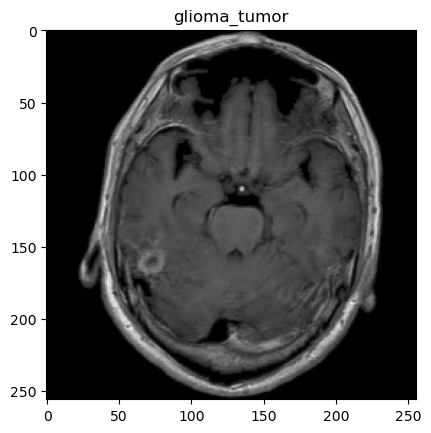

In [5]:
img = plt.imread((root + out_classes[0] + '/' + (os.listdir(root + out_classes[0])[1])))
plt.imshow(img)
plt.title(out_classes[0])

In [6]:
img_size = [224, 224, 3]

In [7]:
model = MobileNetV3Small(input_shape= img_size, weights='imagenet', include_top=False)

4334752/4334752 [==============================] - 3s 1us/step


In [8]:
 for layer in model.layers:
        layer.trainable = False

In [9]:
x = Flatten()(model.output)
pred = Dense(units= out_size, activation= 'softmax')(x)

model = Model(inputs = model.input, outputs  = pred)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                                    

 expanded_conv_1/depthwise/  (None, 28, 28, 72)           288       ['expanded_conv_1/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 re_lu_4 (ReLU)              (None, 28, 28, 72)           0         ['expanded_conv_1/depthwise/Ba
                                                                    tchNorm[0][0]']               
                                                                                                  
 expanded_conv_1/project (C  (None, 28, 28, 24)           1728      ['re_lu_4[0][0]']             
 onv2D)                                                                                           
                                                                                                  
 expanded_

 mbda)                                                                                            
                                                                                                  
 multiply_2 (Multiply)       (None, 14, 14, 96)           0         ['expanded_conv_3/depthwise/Ba
                                                                    tchNorm[0][0]',               
                                                                     'tf.math.multiply_3[0][0]']  
                                                                                                  
 expanded_conv_3/squeeze_ex  (None, 1, 1, 96)             0         ['multiply_2[0][0]']          
 cite/AvgPool (GlobalAverag                                                                       
 ePooling2D)                                                                                      
                                                                                                  
 expanded_

 cite/Conv (Conv2D)                                                 te/AvgPool[0][0]']            
                                                                                                  
 expanded_conv_4/squeeze_ex  (None, 1, 1, 64)             0         ['expanded_conv_4/squeeze_exci
 cite/Relu (ReLU)                                                   te/Conv[0][0]']               
                                                                                                  
 expanded_conv_4/squeeze_ex  (None, 1, 1, 240)            15600     ['expanded_conv_4/squeeze_exci
 cite/Conv_1 (Conv2D)                                               te/Relu[0][0]']               
                                                                                                  
 tf.__operators__.add_7 (TF  (None, 1, 1, 240)            0         ['expanded_conv_4/squeeze_exci
 OpLambda)                                                          te/Conv_1[0][0]']             
          

 cite/Conv_1 (Conv2D)                                               te/Relu[0][0]']               
                                                                                                  
 tf.__operators__.add_10 (T  (None, 1, 1, 240)            0         ['expanded_conv_5/squeeze_exci
 FOpLambda)                                                         te/Conv_1[0][0]']             
                                                                                                  
 re_lu_15 (ReLU)             (None, 1, 1, 240)            0         ['tf.__operators__.add_10[0][0
                                                                    ]']                           
                                                                                                  
 tf.math.multiply_10 (TFOpL  (None, 1, 1, 240)            0         ['re_lu_15[0][0]']            
 ambda)                                                                                           
          

                                                                                                  
 tf.math.multiply_13 (TFOpL  (None, 1, 1, 120)            0         ['re_lu_18[0][0]']            
 ambda)                                                                                           
                                                                                                  
 expanded_conv_6/squeeze_ex  (None, 14, 14, 120)          0         ['multiply_8[0][0]',          
 cite/Mul (Multiply)                                                 'tf.math.multiply_13[0][0]'] 
                                                                                                  
 expanded_conv_6/project (C  (None, 14, 14, 48)           5760      ['expanded_conv_6/squeeze_exci
 onv2D)                                                             te/Mul[0][0]']                
                                                                                                  
 expanded_

 tchNorm (BatchNormalizatio                                         ]']                           
 n)                                                                                               
                                                                                                  
 expanded_conv_7/Add (Add)   (None, 14, 14, 48)           0         ['expanded_conv_6/project/Batc
                                                                    hNorm[0][0]',                 
                                                                     'expanded_conv_7/project/Batc
                                                                    hNorm[0][0]']                 
                                                                                                  
 expanded_conv_8/expand (Co  (None, 14, 14, 288)          13824     ['expanded_conv_7/Add[0][0]'] 
 nv2D)                                                                                            
          

 expanded_conv_9/expand (Co  (None, 7, 7, 576)            55296     ['expanded_conv_8/project/Batc
 nv2D)                                                              hNorm[0][0]']                 
                                                                                                  
 expanded_conv_9/expand/Bat  (None, 7, 7, 576)            2304      ['expanded_conv_9/expand[0][0]
 chNorm (BatchNormalization                                         ']                            
 )                                                                                                
                                                                                                  
 tf.__operators__.add_20 (T  (None, 7, 7, 576)            0         ['expanded_conv_9/expand/Batch
 FOpLambda)                                                         Norm[0][0]']                  
                                                                                                  
 re_lu_25 

                                                                                                  
 tf.__operators__.add_23 (T  (None, 7, 7, 576)            0         ['expanded_conv_10/expand/Batc
 FOpLambda)                                                         hNorm[0][0]']                 
                                                                                                  
 re_lu_28 (ReLU)             (None, 7, 7, 576)            0         ['tf.__operators__.add_23[0][0
                                                                    ]']                           
                                                                                                  
 tf.math.multiply_23 (TFOpL  (None, 7, 7, 576)            0         ['re_lu_28[0][0]']            
 ambda)                                                                                           
                                                                                                  
 multiply_

                                                                                                  
 multiply_17 (Multiply)      (None, 7, 7, 576)            0         ['Conv_1/BatchNorm[0][0]',    
                                                                     'tf.math.multiply_26[0][0]'] 
                                                                                                  
 flatten (Flatten)           (None, 28224)                0         ['multiply_17[0][0]']         
                                                                                                  
 dense (Dense)               (None, 4)                    112900    ['flatten[0][0]']             
                                                                                                  
Total params: 1052020 (4.01 MB)
Trainable params: 112900 (441.02 KB)
Non-trainable params: 939120 (3.58 MB)
__________________________________________________________________________________________________


In [11]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam', 
             metrics = ['accuracy'])

In [ ]:
data_gen = ImageDataGenerator()